#### ПР2 Методы реализации базовых алгоритмов на графах

In [1]:
from __future__ import annotations

from dataclasses import dataclass, field

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

from trace_log import trace
from perfomance import get_average_exec_time

##### Реализация алгоритма **Поиск компонент связности**

Создание класса `Node` для хранения информации об узле графа

In [2]:
@dataclass
class Node:
    name: str
    neighbors: list[Node] = field(default_factory=list)

    def __str__(self) -> str:
        return f"Node(name={self.name}, neighbors={[repr(n) for n in self.neighbors]})"

    def __repr__(self) -> str:
        return f"Node({self.name})"

    def __hash__(self) -> int:
        return hash(self.name)

In [3]:
def get_nodes_list_from_adj_matrix(adj_matrix: list[list[int]]) -> list[Node]:
    nodes_dict = {i: Node(name=str(i)) for i, _ in enumerate(adj_matrix)}

    for i, row in enumerate(adj_matrix):
        for j, it in enumerate(row):
            if it:
                node1: Node = nodes_dict.setdefault(i, Node(name=str(i)))
                node2: Node = nodes_dict.setdefault(j, Node(name=str(j)))

                node1.neighbors.append(node2)
                node2.neighbors.append(node1)

    return list(nodes_dict.values())

Создание списка узлов графа `nodes` на основе матрицы смежности.

In [4]:
adj_matrix = [
    [0, 1, 1, 0, 0, 0, 0],
    [1, 0, 1, 0, 0, 0, 0],
    [1, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 0],
    [0, 0, 0, 1, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0],
]

nodes = get_nodes_list_from_adj_matrix(adj_matrix)

Создание функции `draw_graph` для визуализации графа на основе матрицы смежности.

In [5]:
def draw_graph(adj_matrix: list[list[int]]) -> None:
    edges = [(i, j) for i, row in enumerate(adj_matrix) for j, it in enumerate(row) if it]

    g = nx.Graph()
    g.add_nodes_from(range(0, 7))
    g.add_edges_from(edges)

    nx.draw_kamada_kawai(g, with_labels=True, font_weight="bold")
    plt.show()

Визуализация полученного графа.

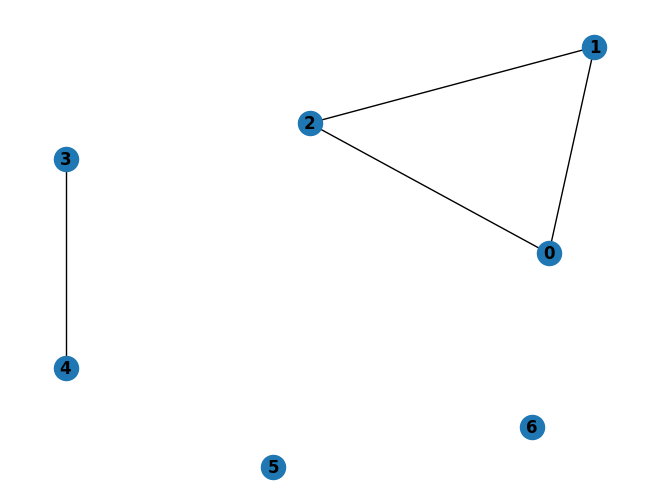

In [6]:
draw_graph(adj_matrix)

Создание функции `find_connected_nighbors`, реализующей алгоритм поиска компонент связности. Для отладки работы алгоритма внутренняя функция `dfs`, реализующая поиск в глубину, обернута в логирующий декоратор `trace`, который позволит отследить все рекурсивные вызовы.

In [7]:
def find_connected_components(nodes: list[Node]) -> list[list[Node]]:
    visited = set()
    components: list[list[Node]] = []

    @trace(sep="|", size=2)
    def dfs(node: Node, component: list[Node]) -> None:
        visited.add(node)
        component.append(node)
        for neighbor in node.neighbors:
            if neighbor not in visited:
                dfs(neighbor, component)

    for node in nodes:
        if node not in visited:
            component = []
            dfs(node, component)
            components.append(component)

    return components

Вызов функции `find_connected_components` для полученного списка найденных компонент `components`. В логах вызова можно увидеть все рекурсивные вызовы функции `dfs` и отследить этапы работы алгоритма.

In [8]:
components = find_connected_components(nodes)

[2025-03-09 23:25:36,278] || call func 'dfs' with args (Node(0), []) and kwargs {}
[2025-03-09 23:25:36,279] |||| call func 'dfs' with args (Node(1), [Node(0)]) and kwargs {}
[2025-03-09 23:25:36,280] |||||| call func 'dfs' with args (Node(2), [Node(0), Node(1)]) and kwargs {}
[2025-03-09 23:25:36,280] |||| call func 'dfs' got resuts None
[2025-03-09 23:25:36,280] || call func 'dfs' got resuts None
[2025-03-09 23:25:36,281]  call func 'dfs' got resuts None
[2025-03-09 23:25:36,281] || call func 'dfs' with args (Node(3), []) and kwargs {}
[2025-03-09 23:25:36,281] |||| call func 'dfs' with args (Node(4), [Node(3)]) and kwargs {}
[2025-03-09 23:25:36,281] || call func 'dfs' got resuts None
[2025-03-09 23:25:36,281]  call func 'dfs' got resuts None
[2025-03-09 23:25:36,282] || call func 'dfs' with args (Node(5), []) and kwargs {}
[2025-03-09 23:25:36,282]  call func 'dfs' got resuts None
[2025-03-09 23:25:36,282] || call func 'dfs' with args (Node(6), []) and kwargs {}
[2025-03-09 23:25:3

Вывод полученного списка компонент связности.

In [9]:
print(
    "Connected components:\n",
    *[f"({", ".join(repr(n) for n in c)})" for c in components],
    sep="\n",
)

Connected components:

(Node(0), Node(1), Node(2))
(Node(3), Node(4))
(Node(5))
(Node(6))


##### Построение правильной квадратной решетки

Создание функции `get_quadratic_lattice_graph` для генерации правильной квадратной решетки заданного размера.

In [10]:
def get_quadratic_lattice_graph(m: int) -> list[list[int]]:
    adj_matrix = [[0] * m * m for _ in range(m * m)]

    for v in range(m * m):
        row = v // m
        col = v % m

        if col < (m - 1):
            adj_matrix[v][v + 1] = adj_matrix[v + 1][v] = 1

        if row < (m - 1):
            adj_matrix[v][v + m] = adj_matrix[v + m][v] = 1

    return adj_matrix

Создание матрицы смежности для правильной квадратной решетки. Вывод полученной матрицы смежности для правильной квадратной решетки.

In [11]:
adj_matrix = get_quadratic_lattice_graph(3)

print(
    "Adjacency matrix for quadratic lattice graph:\n",
    *adj_matrix,
    sep="\n",
)

Adjacency matrix for quadratic lattice graph:

[0, 1, 0, 1, 0, 0, 0, 0, 0]
[1, 0, 1, 0, 1, 0, 0, 0, 0]
[0, 1, 0, 0, 0, 1, 0, 0, 0]
[1, 0, 0, 0, 1, 0, 1, 0, 0]
[0, 1, 0, 1, 0, 1, 0, 1, 0]
[0, 0, 1, 0, 1, 0, 0, 0, 1]
[0, 0, 0, 1, 0, 0, 0, 1, 0]
[0, 0, 0, 0, 1, 0, 1, 0, 1]
[0, 0, 0, 0, 0, 1, 0, 1, 0]


Визуализация полученного графа.

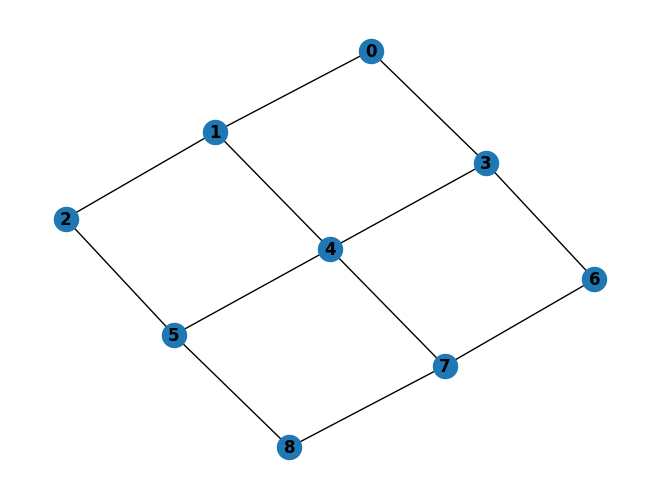

In [12]:
draw_graph(adj_matrix)

##### Тестирование производительности

Запуск расчета среднего времени выполнения алгортима для матрицы размерами от 2х2 до 7х7.

In [39]:
MIN_SIZE = 2
MAX_SIZE = 7

test_results = [
    get_average_exec_time(
        find_connected_components,
        get_nodes_list_from_adj_matrix(
            get_quadratic_lattice_graph(m)
        )
    )
    for m in range(MIN_SIZE, MAX_SIZE + 1)
]

[2025-03-09 21:51:56,998.998] || call func 'dfs' with args (Node(0), []) and kwargs {}
[2025-03-09 21:51:56,999.999] |||| call func 'dfs' with args (Node(1), [Node(0)]) and kwargs {}
[2025-03-09 21:51:56,999.999] |||||| call func 'dfs' with args (Node(3), [Node(0), Node(1)]) and kwargs {}
[2025-03-09 21:51:57,000.000] |||||||| call func 'dfs' with args (Node(2), [Node(0), Node(1), Node(3)]) and kwargs {}
[2025-03-09 21:51:57,000.000] |||||| call func 'dfs' got resuts None
[2025-03-09 21:51:57,000.000] |||| call func 'dfs' got resuts None
[2025-03-09 21:51:57,000.000] || call func 'dfs' got resuts None
[2025-03-09 21:51:57,000.000]  call func 'dfs' got resuts None
[2025-03-09 21:51:57,000.000] || call func 'dfs' with args (Node(0), []) and kwargs {}
[2025-03-09 21:51:57,001.001] |||| call func 'dfs' with args (Node(1), [Node(0)]) and kwargs {}
[2025-03-09 21:51:57,001.001] |||||| call func 'dfs' with args (Node(3), [Node(0), Node(1)]) and kwargs {}
[2025-03-09 21:51:57,001.001] ||||||||

Вывод результатов тестирования.

In [55]:
print(
    "Average execution time:",
    *[f"{i + 2}x{i + 2}: {time:.5f}" for i, time in enumerate(test_results)],
    sep="\n",
)

Average execution time:
2x2: 0.00204
3x3: 0.00431
4x4: 0.00713
5x5: 0.01180
6x6: 0.01705
7x7: 0.02747


Вывод результатов тестирования в виде графика.

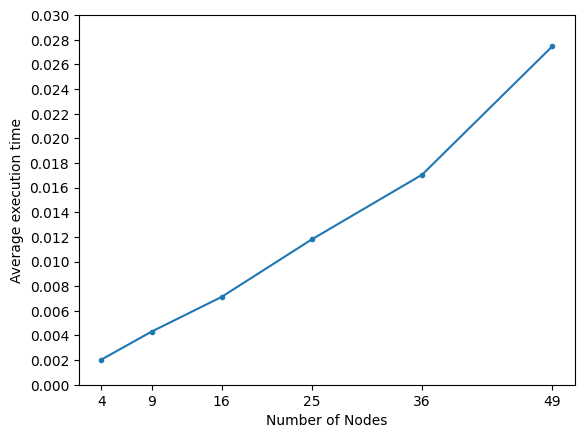

In [49]:
plt.plot(
    [x * x for x in range(MIN_SIZE, MAX_SIZE + 1)],
    test_results,
    marker=".",
)
plt.xlabel("Number of Nodes")
plt.ylabel("Average execution time")
plt.xticks([x * x for x in range(MIN_SIZE, MAX_SIZE + 1)])
plt.yticks(np.arange(0, 0.032, 0.002))
plt.show()